<a href="https://colab.research.google.com/github/SDPreetham/Graduate_Admissions-Predictive_Modelling/blob/main/Jamboree_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Graduate Admissions Prediction: A Data-Driven Modelling for Jamboree**

- By S D Preetham

**Problem Description:**

* Jamboree has recently launched a feature where graduate students can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

* The problem at hand involves predicting the chances of graduate admission to Ivy League colleges for students, based on various factors such as GRE scores, TOEFL scores, undergraduate GPA, research experience. Using the Jamboree dataset, the goal is to analyze the interrelationships between these variables and develop a predictive model that can estimate an applicant's likelihood of admission. The approach involves performing Exploratory Data Analysis, followed by building a linear regression model to quantify the impact of each factor on admission probability and provide actionable insights for prospective graduate applicants.

In [87]:
import numpy as np
import pandas as pd

df = pd.read_csv('jamboree.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [88]:
#Dropping the serial number column for accurate analysis
df = df.drop(['Serial No.'], axis =1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### **Exploratory Data Analysis:**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [90]:
# Converting the Research column to category type
df['Research'] = df['Research'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    int64   
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    float64 
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(1), float64(4), int64(3)
memory usage: 28.1 KB


**Explanation:**
* This conversion is done to improve memory efficiency and ensure the data type reflects the nature of the column (categorical data).

In [91]:
print('The number of datapoints (rows): ', df.shape[0])
print('The number of columns: ', df.shape[1])


The number of datapoints (rows):  500
The number of columns:  8


**Insights:**
* It has been observed that the dataset contains the educational details of 500 students
* The target variable (Chance of admit) is determined based on 7 various features.

In [92]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,0.97000


In [93]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Total duplicate rows: {num_duplicates}")

Total duplicate rows: 0


In [94]:
# Checking for missing data
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**Overall Insights:**
* The dataset appears is well-structured, with no missing values and a good mix of numerical and categorical features. The presence of various continuous and discrete variables, along with the target variable (Chance of Admit), provides a solid foundation for performing both exploratory analysis and predictive modeling.

### **Data Visualization and Analysis:**

**Univariate Analysis:**

* Distribution plots for all the continuous variables:


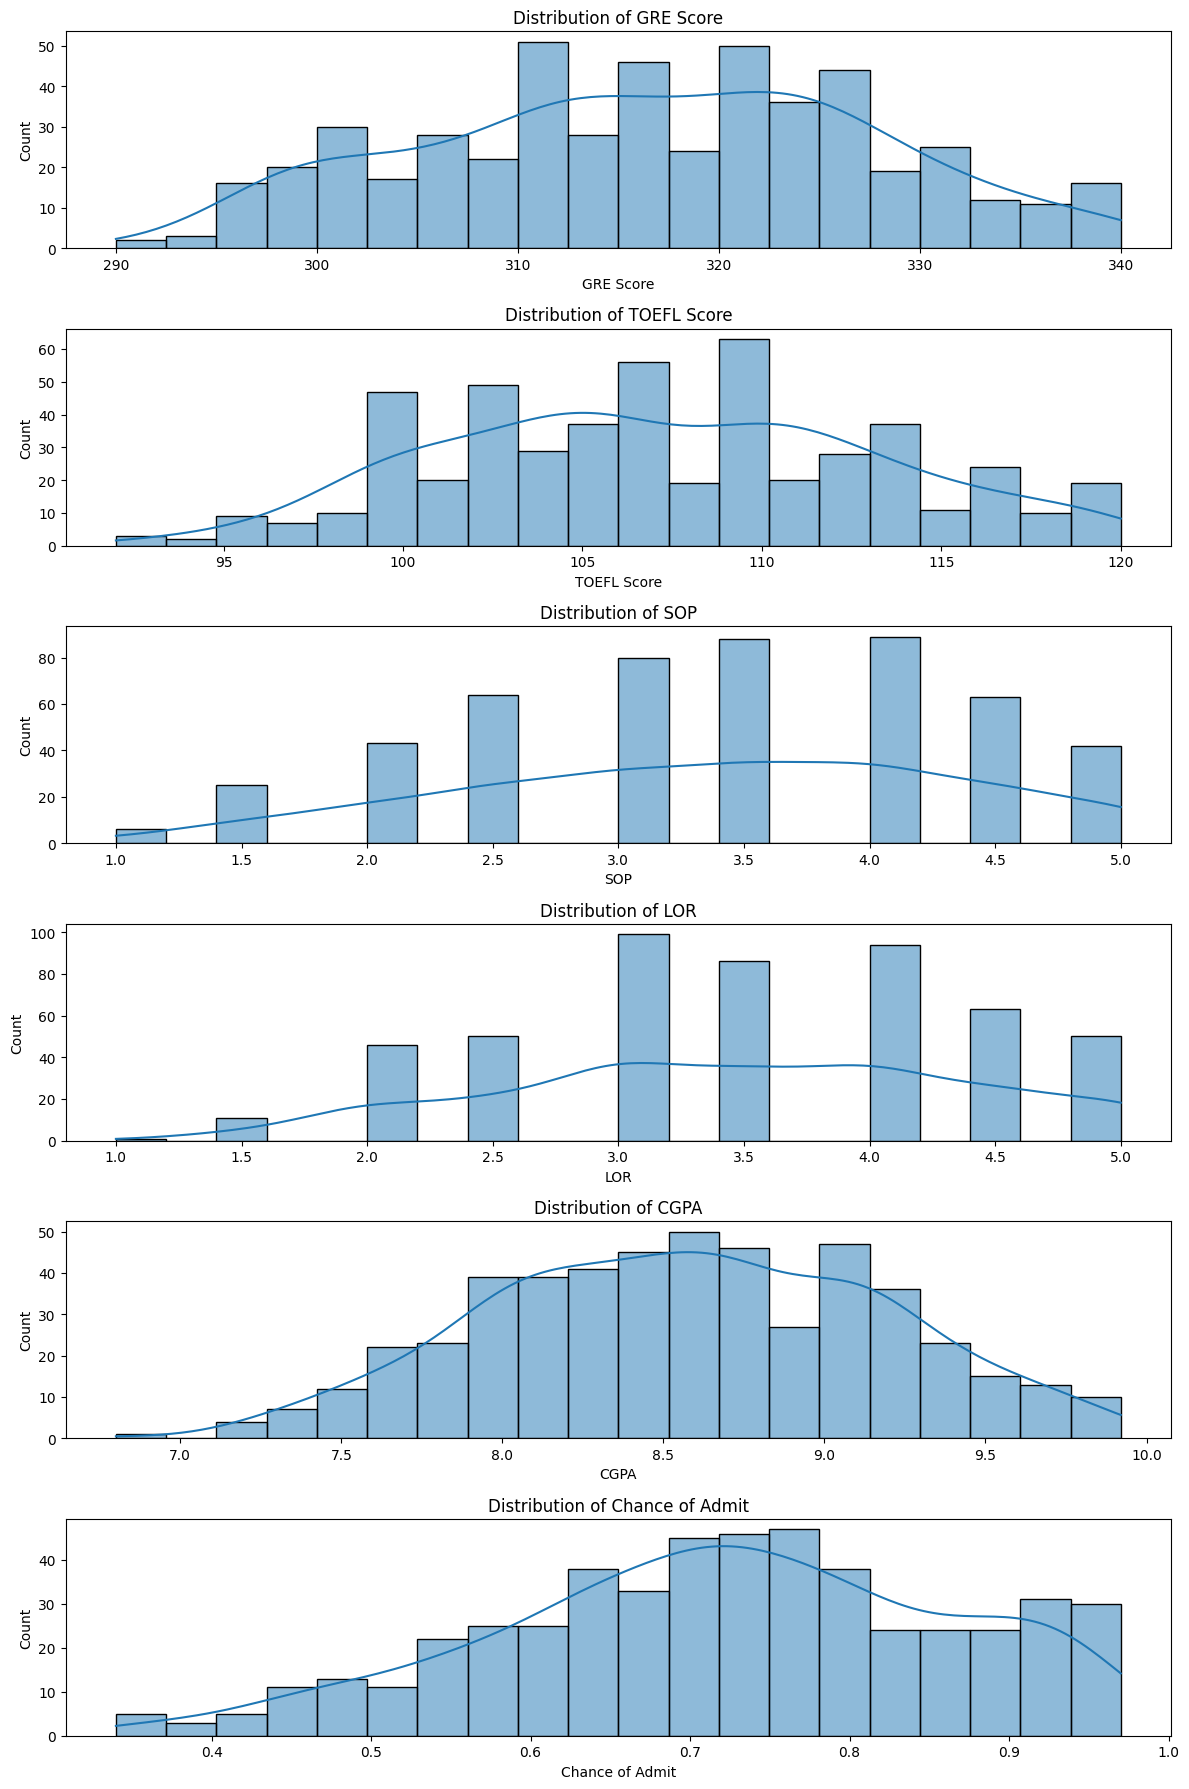

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip()

continuous_val = ['GRE Score','TOEFL Score','SOP', 'LOR', 'CGPA', 'Chance of Admit']

plt.figure(figsize = (12, len(continuous_val)*3))

for i, val in enumerate(continuous_val):
  plt.subplot(len(continuous_val),1,i+1)
  sns.histplot(df[val], kde = True, bins = 20)
  plt.title(f'Distribution of {val}')

plt.tight_layout()
plt.show()


* Bar plot for categorical variables:

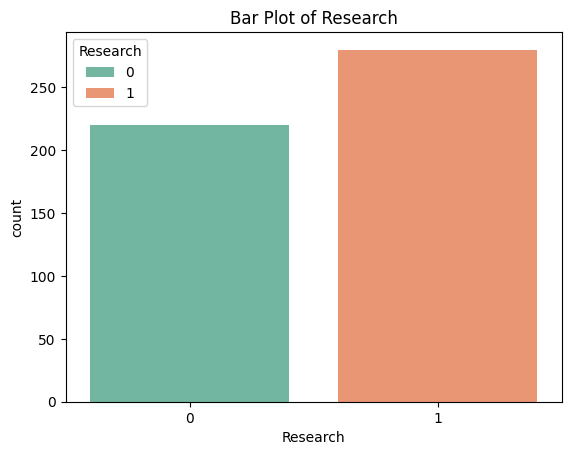

In [96]:
# Finding the no-research vs research experience break-up
sns.countplot(x='Research', data = df, hue = 'Research',palette = 'Set2')
plt.title('Bar Plot of Research')
plt.show()

In [127]:
print(df['Research'].value_counts())
print('The number of students with no research experience: ',df['Research'].value_counts()[0])
print('The number of students with research experience: ',df['Research'].value_counts()[1])

Research
1    280
0    220
Name: count, dtype: int64
The number of students with no research experience:  220
The number of students with research experience:  280


**Bivariate Analysis:**

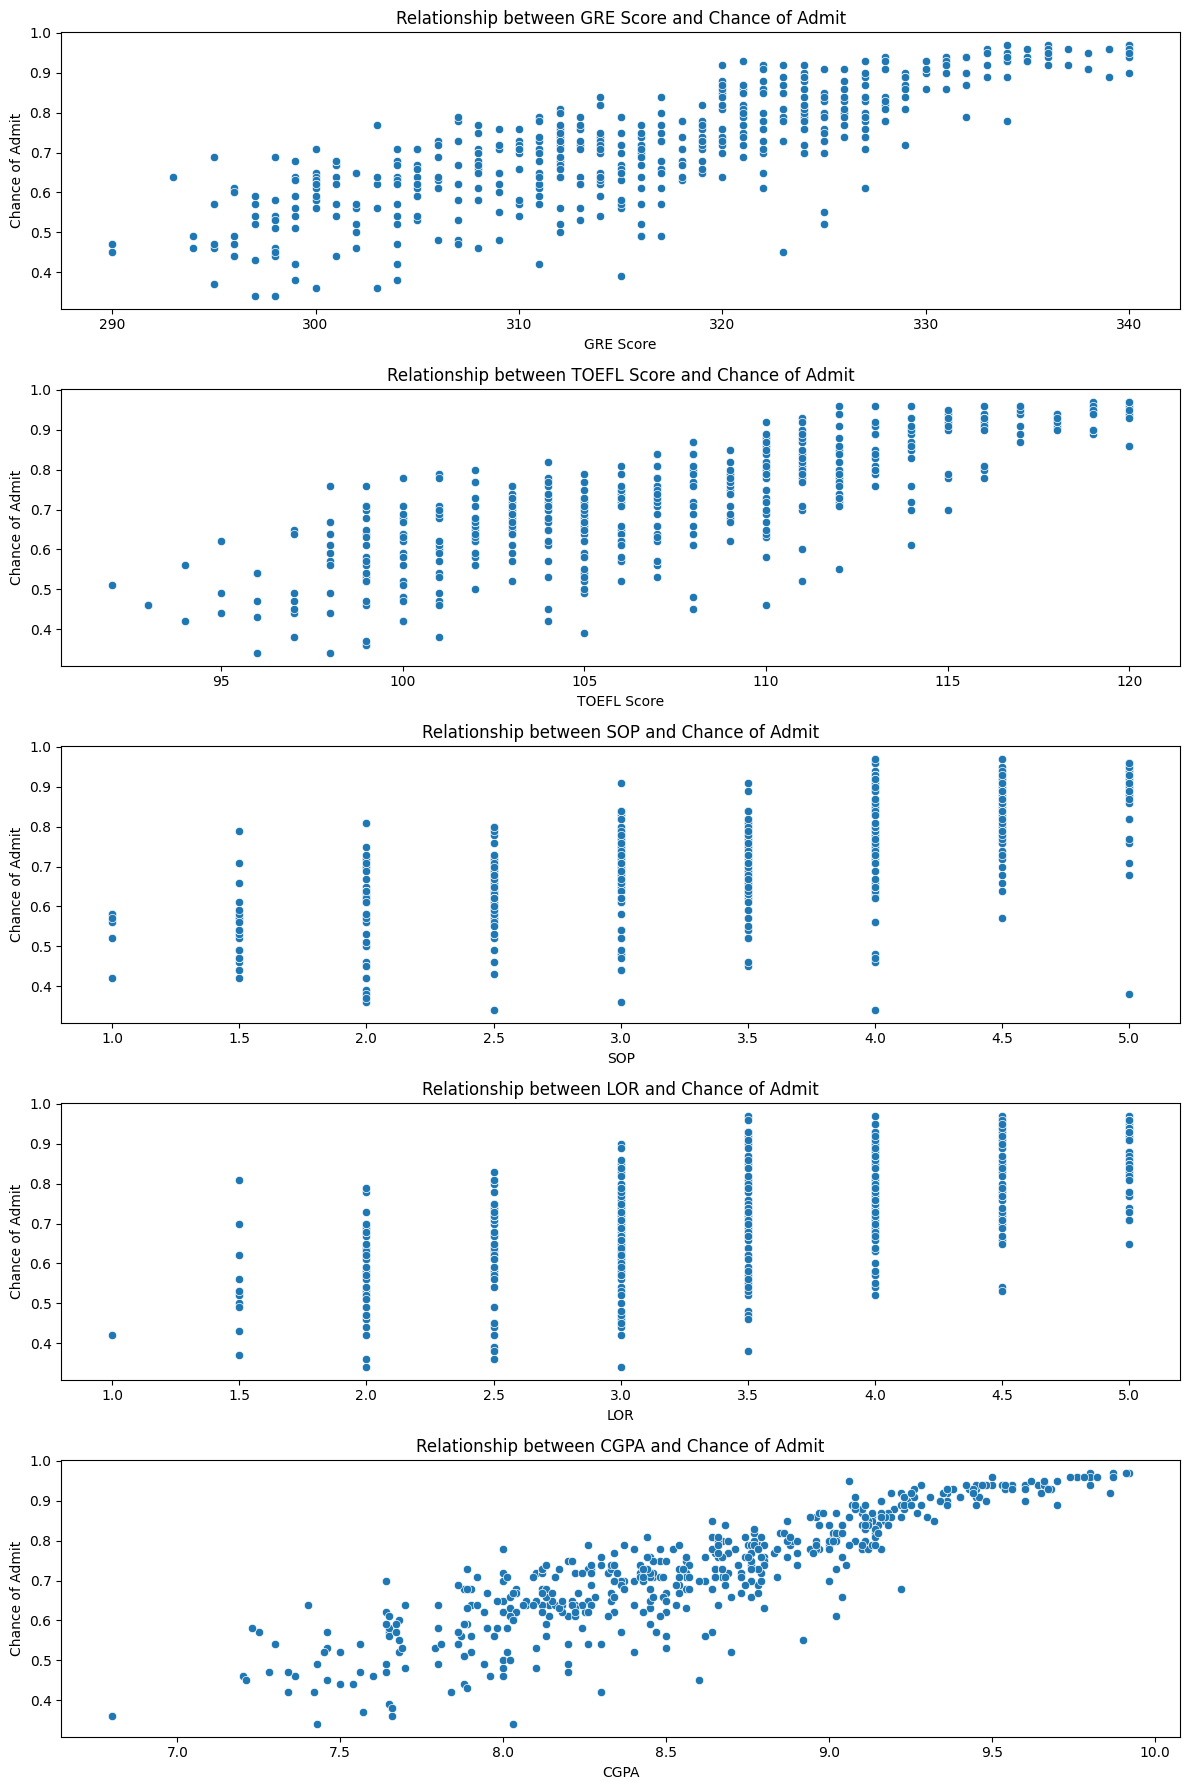

In [98]:
plt.figure(figsize=(12, len(continuous_val) * 3))
for i, var in enumerate(continuous_val[:-1]):  # Exclude 'Chance of Admit' itself
    plt.subplot(len(continuous_val) - 1, 1, i + 1)
    sns.scatterplot(x=df[var], y=df['Chance of Admit'])
    plt.title(f'Relationship between {var} and Chance of Admit')

plt.tight_layout()
plt.show()


**Insights:**
* The scatter plots indicate strong positive correlations between GRE, TOEFL, CGPA and the chance of admission, with CGPA showing the highest impact. As scores increase, the likelihood of admission rises significantly.
* SOP and LOR exhibit a weaker and more scattered relationship, suggesting that while they contribute, they may not be primary deciding factors.


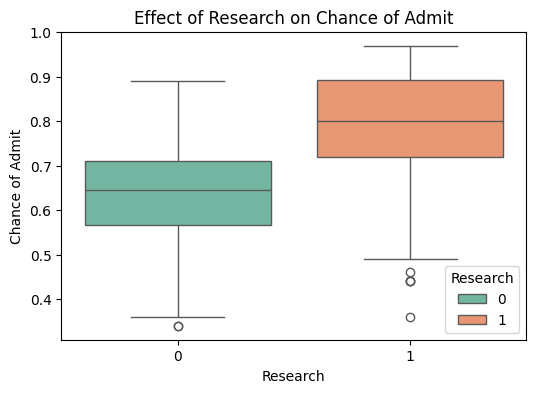

In [99]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Research'], y=df['Chance of Admit'],hue = df['Research'], palette='Set2')
plt.title(f'Effect of Research on Chance of Admit')
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.show()

**Insight:**
* It is observed that the median chances of admit of students with prior research experience are higher(0.8) than those with no research experience(0.65).
* Thus, it is evident that students with prior research experience are more likely to get admitted into IVY league college.

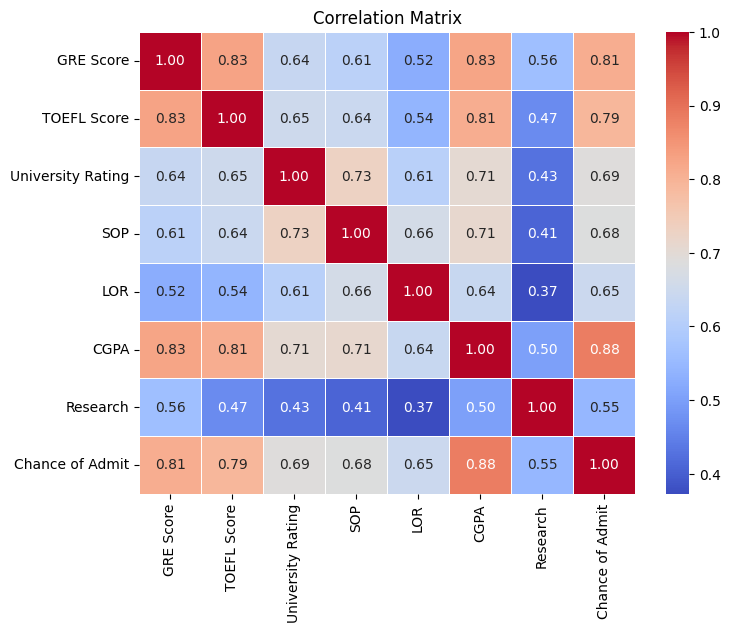

In [100]:
# --- Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Insights:**

* It is observed that chances of admit shows a high positive correlation with various factors such as GRE Score, TOEFL Score, CGPA. This indicates students with high scores and CGPA are highly likely to get admission.

* Chances of admission also shows a positive correlation with other factors such as university rating, SOP, LOR and reserach. This highlights the significance of maintaining a well-rounded profile, where academic excellence is complemented by strong recommendations, research exposure and a compelling statement of purpose.

### **Outlier Detection and Outlier Treatment:**

In [101]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[numeric_columns] = df[numeric_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)


**Explanation:**
* The outliers are capped to lower/upper bounds.

### **Preparing the data for Modelling:**

* Label Encoding for Binary Categorical Columns (Research):

In [102]:
df['Research'] = df['Research'].astype('category').cat.codes

**Explanation:**
* Label encoding converts categorical values in the "Research" column ("Yes" and "No") into numerical values (1 and 0, respectively), making it suitable for machine learning models.

* One-Hot Encoding for Multi-Class Categorical Columns (University Rating):

In [103]:
df = pd.get_dummies(df, columns = ['University Rating'], drop_first = True)

**Explanation:**

* Since 'University Rating' is categorical, one-hot encoding transforms it into a numerical representation that the model can use for analysis and prediction.

* It creates new columns for each unique rating (barring rating 1, to prevent multicollinearity) and then places a 1 in the correct column if the rating is present for that row and a 0 otherwise.

 **Feature Scaling:**

In [104]:
from sklearn.preprocessing import StandardScaler
continuous_features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']
categorical_features = ['Research', 'University Rating_2', 'University Rating_3', 'University Rating_4', 'University Rating_5']

df_continuous = df[continuous_features]
scaler = StandardScaler()
df_continuous_scaled = scaler.fit_transform(df_continuous)
df_continuous_scaled = pd.DataFrame(df_continuous_scaled, columns=continuous_features)
df_final = pd.concat([df_continuous_scaled, df[categorical_features]], axis=1)
df_final.head()


,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,Research,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,1.819238,1.778865,1.137360,1.100744,1.776806,1.406502,1,False,False,True,False
1,0.667148,-0.031601,0.632315,1.100744,0.485859,0.271311,1,False,False,True,False
2,-0.041830,-0.525364,-0.377773,0.016267,-0.954043,-0.012487,1,False,True,False,False
3,0.489904,0.462163,0.127271,-1.068210,0.154847,0.555109,1,False,True,False,False
4,-0.219074,-0.689952,-1.387862,-0.525971,-0.606480,-0.509133,0,True,False,False,False


In [105]:
# Defining target and features
y = df_final['Chance of Admit']
X = df_final.drop(columns =['Chance of Admit'])

In [106]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Explanation:**
* The dataset has been standardized using Standard Scaling (Z-score normalization), which transforms each feature to have a mean of 0 and a standard deviation of 1. This is done using the formula: Z= X - μ / σ where
X is the original value, μ is the mean, and σ is the standard deviation of the feature.

* The numerical features are scaled to a common scale, ensuring that they have equal importance.
*  Subsequently, the data is prepared for modeling by separating the target variable (Chance of Admit) from the features.

* The dataset then is divided into four parts, allowing us to train a model on one portion of the data (X_train, y_train) and then evaluate its performance on a separate, unseen portion (X_test, y_test). This helps ensure that the model can generalize well to new data.

### **Model Training:**

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Statistics:")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

Linear Regression Model Statistics:
Mean Absolute Error: 0.303
Mean Squared Error: 0.184
R-squared: 0.821


**Insights:**

* The model demonstrates strong predictive performance, as reflected in the Mean Squared Error (MSE) of 0.184, which indicates relatively small prediction errors.
* The R-squared (R²) value of 0.821 shows that the model can explain 82.1% of the variation in the chance of admission, suggesting that the features used in the model are highly relevant and contribute significantly to predicting admission chances.
* Overall, the combination of a low MSE and high R² indicates that the model is both accurate and capable of capturing the key factors influencing the chances of admission.

**Model Coefficients (Weights):**

In [108]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
coefficients

,Coefficient
GRE Score,0.193844
TOEFL Score,0.130693
SOP,0.018460
LOR,0.112589
CGPA,0.478792
Research,0.170385
University Rating_2,-0.049637
University Rating_3,-0.054326
University Rating_4,-0.056043
University Rating_5,0.055137


**Insights:**

* CGPA has the most significant positive effect on admission chances, with each point increase in CGPA raising the chance by 0.48.
* This is followed by GRE score, with each point increase in GRE score boosting the chance by approximately 0.19. Similarly, a higher TOEFL score also increases the chance of admission, contributing about 0.13 for each additional point.
* Similarly, having a prior research experience and a strong LOR also increase the admission chances.


In [109]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Train performance metrics
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
train_r2 = r2_score(y_train, train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

# Test performance metrics
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_r2 = r2_score(y_test, test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Train Performance:")
print(f"MAE: {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"R²: {train_r2:.4f}")
print(f"Adj R²: {train_adj_r2:.4f}")

print("\nTest Performance:")
print(f"MAE: {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")
print(f"Adj R²: {test_adj_r2:.4f}")


Train Performance:
MAE: 0.3010
RMSE: 0.4194
R²: 0.8225
Adj R²: 0.8180

Test Performance:
MAE: 0.3031
RMSE: 0.4294
R²: 0.8209
Adj R²: 0.8007


**Performance Evalution:**

* Based on the performance metrics, the model demonstrates strong predictive capability. The Train Performance shows a MAE of 0.3010 and RMSE of 0.4194, indicating that, on average, the model's predictions are relatively close to the actual values and there is a small degree of error. The R² value of 0.8225 suggests that the model explains 82.25% of the variation in the training data. Similarly, the Adj R² value of 0.8180 accounts for the number of predictors, confirming that the model fits the training data well without overfitting.

* Test Performance metrics with MAE of 0.3031 and RMSE of 0.4294 are slightly higher than the training performance but still within a reasonable range, indicating that the model generalizes well to unseen data. The R² value of 0.8209 is nearly identical to the training performance and the Adj R² value of 0.8007 is also quite close, suggesting that the model is not overfitting and is able to perform consistently on both training and test datasets.

* Overall, the model performs well, with only a slight difference in performance between the train and test sets. The model is generalizing effectively and explaining a significant amount of variance in the data.This accuracy can be further maximized by exploring other features or trying more advanced models.

 **Testing the assumptions of the linear regression model:**

 * Multicollinearity check by VIF score:

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = X.select_dtypes(include=[np.number])
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_data

,feature,VIF
0,const,2.895604
1,GRE Score,4.453096
2,TOEFL Score,3.874079
3,SOP,2.448995
4,LOR,1.988359
5,CGPA,4.680662
6,Research,1.489403


**Insights:**

* This code helps identify features that might be highly correlated with each other, which is crucial for building a reliable and interpretable linear regression model.

* No high VIF values: All features have VIF values below 5, which means there's no significant multicollinearity problem in the dataset.

**Checking the mean of residuals:**

In [111]:
residuals = y_test - y_pred  # Both should come from the test set
print(f"Mean of Residuals: {residuals.mean()}")



Mean of Residuals: -0.03722332201105618


**Insights:**
* The mean of residuals is close to zero.
* This is a desirable outcome because, in a well-fitted linear regression model, the residuals (errors) should have a mean close to zero.

**Checking the linearity of residuals:**

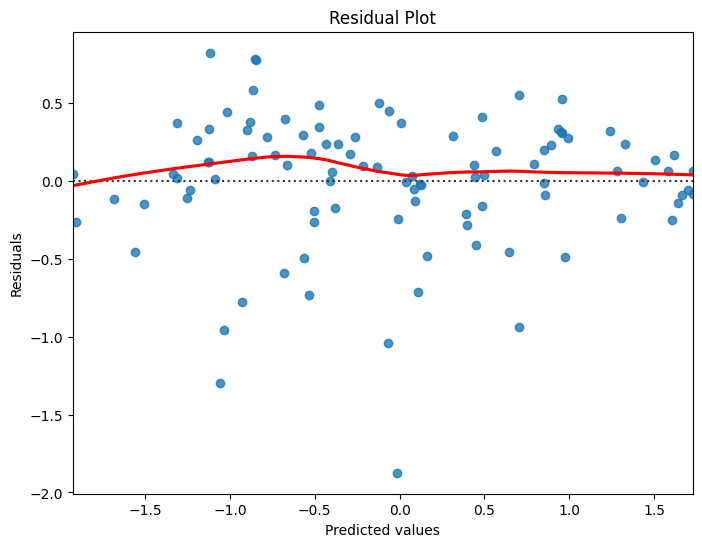

In [112]:
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

**Insights:**
* The residual plot suggests that the model largely follows the assumptions of linear regression, with residuals scattered randomly around zero, indicating a mostly linear relationship. However, the slight curvature in the red trend line hints at a slight degree of non-linearity in the data.

**Analyzing homoskedasticity:**


In [117]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Ensure X_train and y_train are numeric
X_train = X_train.select_dtypes(include=[np.number]).copy()  # Keep only numeric features
y_train = pd.to_numeric(y_train, errors='coerce')

# Handle missing values
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

# Add constant term for intercept
X_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_const).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(ols_model.resid, X_const)
bp_test_stat, bp_p_value = bp_test[0], bp_test[1]

# Print test result
print(f"Breusch-Pagan Test p-value: {bp_p_value}")

# Interpretation
if bp_p_value < 0.05:
    print("Heteroscedasticity detected (variance is not constant).")
else:
    print("No evidence of heteroscedasticity (variance is constant).")


Breusch-Pagan Test p-value: 0.0003956524344430615
Heteroscedasticity detected (variance is not constant).


**Insights:**

* The Breusch-Pagan test p-value (3.45e-05) indicates heteroskedasticity, meaning the variance of residuals is not constant across all levels of the predictors.
* This violates a key assumption of linear regression and suggests that the model may be unreliable in making predictions, especially for extreme values.
* To address this, techniques like log transformation of the target variable, Weighted Least Squares (WLS) or using robust standard errors can help stabilize variance. Regularization methods like Ridge or Lasso regression may also improve model generalization and mitigate the impact of heteroskedasticity.

**Checking Normality of residuals:**

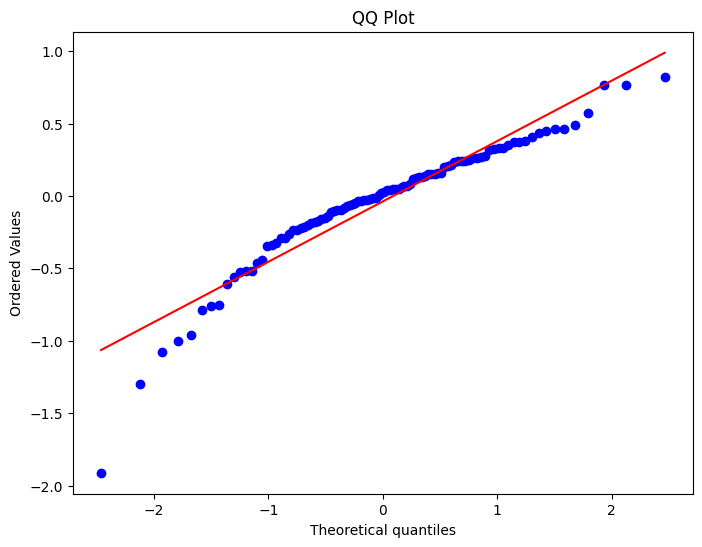

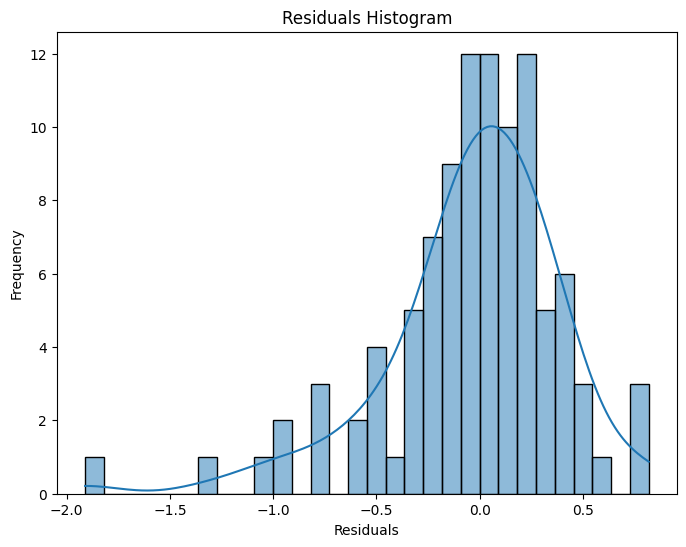

In [118]:
import scipy.stats as stats

# QQ plot
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**Insights:**
* The residual analysis indicates that while the residuals are approximately normal, there are slight deviations, particularly in the tails, as seen in the QQ plot.

Given these findings, we now turn to Ridge and Lasso regression, which introduce regularization to handle potential multicollinearity, improve model generalization and reduce overfitting.

In [120]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Ensure `X_test` has the same columns as `X_train`
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

alpha_values = np.logspace(-4, 4, 50)

# Ridge Regression with Cross-Validation
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression with Cross-Validation
lasso_cv = GridSearchCV(Lasso(), param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}, Ridge MSE: {ridge_mse}")
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}, Lasso MSE: {lasso_mse}")


Best Ridge Alpha: 7.9060432109076855, Ridge MSE: 0.1902216682615335
Best Lasso Alpha: 0.0013894954943731374, Lasso MSE: 0.1889561212445168


In [123]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Evaluates a regression model and prints performance metrics."""

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Adjusted R² Calculation
    n, p = X_train.shape
    train_adj_r2 = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)

    n, p = X_test.shape
    test_adj_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)

    print(f"\n--- {model_name} Performance ---")
    print(f"Train Performance:")
    print(f"MAE: {train_mae:.4f}")
    print(f"RMSE: {train_rmse:.4f}")
    print(f"R²: {train_r2:.4f}")
    print(f"Adj R²: {train_adj_r2:.4f}")

    print(f"\nTest Performance:")
    print(f"MAE: {test_mae:.4f}")
    print(f"RMSE: {test_rmse:.4f}")
    print(f"R²: {test_r2:.4f}")
    print(f"Adj R²: {test_adj_r2:.4f}")

# Evaluate Ridge and Lasso
evaluate_model(best_ridge, X_train, y_train, X_test, y_test, "Ridge Regression")
evaluate_model(best_lasso, X_train, y_train, X_test, y_test, "Lasso Regression")




--- Ridge Regression Performance ---
Train Performance:
MAE: 0.3025
RMSE: 0.4213
R²: 0.8209
Adj R²: 0.8182

Test Performance:
MAE: 0.3062
RMSE: 0.4361
R²: 0.8152
Adj R²: 0.8033

--- Lasso Regression Performance ---
Train Performance:
MAE: 0.3023
RMSE: 0.4210
R²: 0.8212
Adj R²: 0.8184

Test Performance:
MAE: 0.3048
RMSE: 0.4347
R²: 0.8164
Adj R²: 0.8046


**Insights:**
* Among the three models, Linear Regression performed the best with the lowest test MSE (0.184) and highest R² (0.821), indicating the best fit without regularization. Lasso Regression followed closely with a test MSE of 0.1889 and R² of 0.8164, showing slightly higher error but good generalization. Ridge Regression, with a test MSE of 0.1902 and R² of 0.8152, had the highest bias but provided better stability in cases of multicollinearity. Since Lasso did not eliminate any features, its effect was minimal in this case. Overall, Linear Regression is the best choice unless multicollinearity is a concern, in which case Ridge can be preferred.

### **Actionable Insights & Recommendations**
1. **Predictor Significance & Feature Importance**

* It is evident thal all predictors contribute to explaining the target variable, but their impact varies.

* Lasso regression did not eliminate any features, suggesting that all features carry some predictive power and multicollinearity is not severely impacting the model.


2. **Model Selection & Performance Trade-offs**

* Linear Regression performed the best, but Ridge and Lasso provided slight regularization benefits.

* Ridge Regression is beneficial in addressing multicollinearity. However, its impact was minimal in this case.

* Lasso is preferred when feature selection is needed, but since it retained all variables, it may not be necessary.

3. **Addressing Heteroskedasticity**
* The Breusch-Pagan test confirmed heteroskedasticity, indicating that the variance of residuals is not constant.

* Applying log transformations or Weighted Least Squares Regression (WLS) can help stabilize variance.

4. **Additional Data Sources for Model Improvement**
* Extracurricular Achievements: Other achievements, leadership roles and technical projects could add predictive power.

* Demographic & Financial Data: Factors like nationality, work experience and funding options may influence admissions.

5. **Model Implementation in the Real World**

* User-Friendly Web Integration: The model should be integrated into a website with an intuitive UI for students to enter their data and receive real-time admission probability scores.

* Explainability & Transparency: Displaying key influencing factors in results can help students make informed decisions.

* Periodic Model Updates: Regular model retraining with new data will ensure accuracy as admissions criteria get revised often.

6. **Potential Business Benefits from Model Improvement**

* Lead Generation for Coaching Services: Identifying students with borderline scores can help target coaching services for test preparation or profile building.

* Competitive Edge: An accurate and well-validated model can position Jamboree as a leader in AI-driven study abroad counseling, attracting more students.

By refining the model with richer data and optimizing its real-world deployment, Jamboree can drive higher engagement and create new revenue streams through targeted offerings.